# Dimensionality of Data

A Data Dimension is a set of data attributes pertaining to something of interest to a business. Dimensions are things like "customers", "products", "stores" and "time".Data dimensions are entry points to numeric facts (e.g. sale, profit, revenue) that a business wishes to monitor. Best thing is data dimension can be hierarchical. For example, "days" can be grouped into "months", "months" into "quarters" and quarters into "fiscal years" or "calendar years". This allows fact data to be easily aggregated, summarized and presented.We do dimensionality reduction to find hidden relationships in our data.We can use Principal Component Analysis (PCA) together with Cluster Analysis and able to represent in a two-dimensional space data defined in a higher dimensional one while, at the same time, be able to group this data in similar groups or clusters.By reducing a dataset original features or variables to a reduced set of new ones based on the principal components, we end up with the minimum number of variables that keep the maximum amount of variation or information about how the data is distributed. If we end up with just two of these new variables, we will be able to represent each sample in our data in a two-dimensional chart

In [112]:
!type Pollution.csv

State,NO201st0Max0Value,NO201st0Max0Hour,NO20AQI,O301st0Max0Hour,O30AQI,SO201st0Max0Value,SO201st0Max0Hour,SO20AQI,CO01st0Max0Value,CO01st0Max0Hour,CO0AQI
Arizona,49,19,46,10,34,9,21,13,4.2,21,0
Arizona,49,19,46,10,34,9,21,13,2.2,23,25
Arizona,49,19,46,10,34,6.6,23,0,4.2,21,0
Arizona,49,19,46,10,34,6.6,23,0,2.2,23,25
Arizona,36,19,34,10,27,3,22,4,1.6,23,0
Arizona,36,19,34,10,27,3,22,4,2.3,0,26
Arizona,36,19,34,10,27,2.6,23,0,1.6,23,0
Arizona,36,19,34,10,27,2.6,23,0,2.3,0,26
Arizona,51,8,48,9,14,11,19,16,4.4,8,0
Arizona,51,8,48,9,14,11,19,16,2.5,8,28
Arizona,51,8,48,9,14,8.3,20,0,4.4,8,0
Arizona,51,8,48,9,14,8.3,20,0,2.5,8,28
Arizona,74,8,72,9,28,16,8,23,5.1,21,0
Arizona,74,8,72,9,28,16,8,23,3,23,34
Arizona,74,8,72,9,28,12.6,8,0,5.1,21,0
Arizona,74,8,72,9,28,12.6,8,0,3,23,34
Arizona,61,22,58,9,10,15,7,21,5.6,7,0
Arizona,61,22,58,9,10,15,7,21,3.7,2,42
Arizona,61,22,58,9,10,14,8,0,5.6,7,0
Arizona,224,19,124,10,39,3,20,0,3.7,18,0
Arizona,224,19,124,10,39,3,20,0,3.3,1,38
Arizona,256,20,130,

In [113]:
import os
import numpy as np
import pandas as pd
from numpy import *

In [114]:
data= pd.read_table("Pollution.csv",sep=',',header=None)
data.index.names=["State"]
data.columns.names=["Details"]
data.head()

Details,0,1,2,3,4,5,6,7,8,9,10,11
State,,,,,,,,,,,,
0,State,NO201st0Max0Value,NO201st0Max0Hour,NO20AQI,O301st0Max0Hour,O30AQI,SO201st0Max0Value,SO201st0Max0Hour,SO20AQI,CO01st0Max0Value,CO01st0Max0Hour,CO0AQI
1,Arizona,49,19,46,10,34,9,21,13,4.2,21,0
2,Arizona,49,19,46,10,34,9,21,13,2.2,23,25
3,Arizona,49,19,46,10,34,6.6,23,0,4.2,21,0
4,Arizona,49,19,46,10,34,6.6,23,0,2.2,23,25


In [115]:
np_data = data.as_matrix()
np_data[0]

C:\Users\Sandeep\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array(['State', 'NO201st0Max0Value', 'NO201st0Max0Hour', 'NO20AQI',
       'O301st0Max0Hour', 'O30AQI', 'SO201st0Max0Value',
       'SO201st0Max0Hour', 'SO20AQI', 'CO01st0Max0Value',
       'CO01st0Max0Hour', 'CO0AQI'], dtype=object)

Convert all rows data into float

In [116]:
from sklearn.decomposition import PCA
from sklearn import preprocessing 
labelenco = preprocessing.LabelEncoder()
temp =labelenco.fit_transform(data[0])
data[0]=temp
data[0]

State
0      8
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
761    9
762    9
763    9
764    9
765    9
766    9
767    9
768    9
769    9
770    9
771    9
772    9
773    9
774    9
775    9
776    9
777    9
778    9
779    9
780    9
781    9
782    9
783    9
784    9
785    9
786    9
787    9
788    9
789    9
790    9
Name: 0, Length: 791, dtype: int64

In [117]:
data.loc[[0],0:1] = 1,2
data.loc[[0],2:3] = 3,4
data.loc[[0],4:5] = 5,6
data.loc[[0],6:7] = 7,8
data.loc[[0],8:9] = 9,10
data.loc[[0],10:11] = 11,12
data.head()

Details,0,1,2,3,4,5,6,7,8,9,10,11
State,,,,,,,,,,,,
0,1,2,3,4,5,6,7,8,9,10,11,12
1,0,49,19,46,10,34,9,21,13,4.2,21,0
2,0,49,19,46,10,34,9,21,13,2.2,23,25
3,0,49,19,46,10,34,6.6,23,0,4.2,21,0
4,0,49,19,46,10,34,6.6,23,0,2.2,23,25


Principal Component Analysis (PCA) together with Cluster Analysis we can represent in a two-dimensional space data defined in a higher dimensional one.In this section, we want to be able to represent each city in a two dimensional space. In our dataset, each sample is a city defined by 13 different variables, each one corresponding to pollution causing agents counts per million. By using PCA we will be able to reduce these 13 variables to just the two of them that best captures that information.When using this implementation of PCA we need to specify in advance the number of principal components we want to use. Then we can just call the fit() method with our data frame and check the results.

In [118]:
pca=PCA(n_components=2)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [119]:
PCA(copy=True, n_components=2, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [120]:
data_2d = pca.transform(data)

clustering organises data samples by proximity based on its variables. By doing so we will be able to understand how each data point relates to each other and discover groups of similar ones. Once we have each of this groups or clusters, we will be able to define a centroid for them, an ideal data sample that minimises the sum of the distances to each of the data points in a cluster. By analysing these centroids' variables we will be able to define each cluster in terms of its characteristics.

In [121]:
data_2d = pd.DataFrame(data_2d)
data_2d.index = data.index
data_2d.columns = ['PC1','PC2']
data_2d.head()

,PC1,PC2
State,,
0,-56.117649,-21.292797
1,6.752710,-0.880411
2,8.151395,-2.457471
3,6.706765,1.406653
4,8.105449,-0.170407


In [122]:
print(pca.explained_variance_ratio_)

[0.79957664 0.09202188]


We see that the first PC already explains almost 73% of the variance, while the second one accounts for another 13% for a total of almost 86% between the two of them.Now we are ready to plot the lower dimensionality version of our dataset. We just need to call plot on the data frame, by passing the kind of plot we want and what columns correspond to each axis. We also add an annotation loop that tags every point with its city name or its corresponding number.

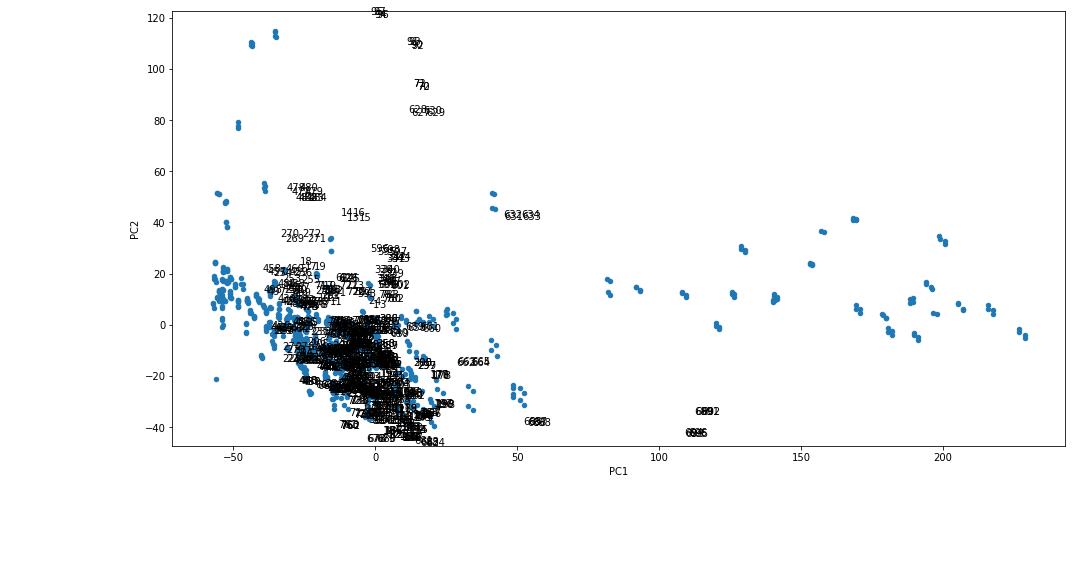

In [123]:
%matplotlib inline
    
ax = data_2d.plot(kind='scatter', x='PC1', y='PC2', figsize=(16,8))
    
for i, location in enumerate(data.index):
    ax.annotate(
        location, 
        (data_2d.iloc[i].PC2,data_2d.iloc[i].PC1)
    )

As we can see from the clusters formed in the the above scatter plot,we can analyse that there are more states effected with same dangerous agents(pollution content).Let's now create a bubble chart, by setting the point size to a value proportional to the mean value for all the pollution agents in that particular state. First we need to add a new column containing the re-scaled mean per city across all the pollution causing agents.

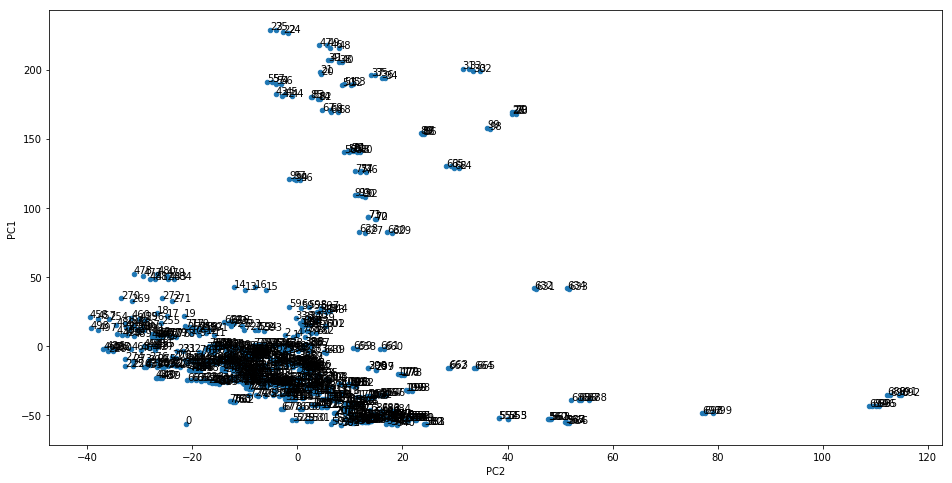

In [124]:
%matplotlib inline
    
ax = data_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))
    
for i, pollution in enumerate(data.index):
    ax.annotate(
        pollution, 
        (data_2d.iloc[i].PC2,data_2d.iloc[i].PC1)
    )

In [125]:
from sklearn.preprocessing import normalize
    
data_2d['pollution_mean'] = pd.Series(data.mean(axis=1), index=data_2d.index)
pollution_mean_max = data_2d['pollution_mean'].max()
pollution_mean_min = data_2d['pollution_mean'].min()
pollution_mean_scaled = (data_2d.pollution_mean-pollution_mean_min) / pollution_mean_max
data_2d['pollution_mean_scaled'] = pd.Series(
        pollution_mean_scaled, 
        index=data_2d.index) 
data_2d.head()


,PC1,PC2,pollution_mean,pollution_mean_scaled
State,,,,
0,-56.117649,-21.292797,1.0,0.1
1,6.752710,-0.880411,0.0,0.0
2,8.151395,-2.457471,0.0,0.0
3,6.706765,1.406653,0.0,0.0
4,8.105449,-0.170407,0.0,0.0


we are ready to plot using this variable size (we will omit the state names this time since we are not so interested in them).

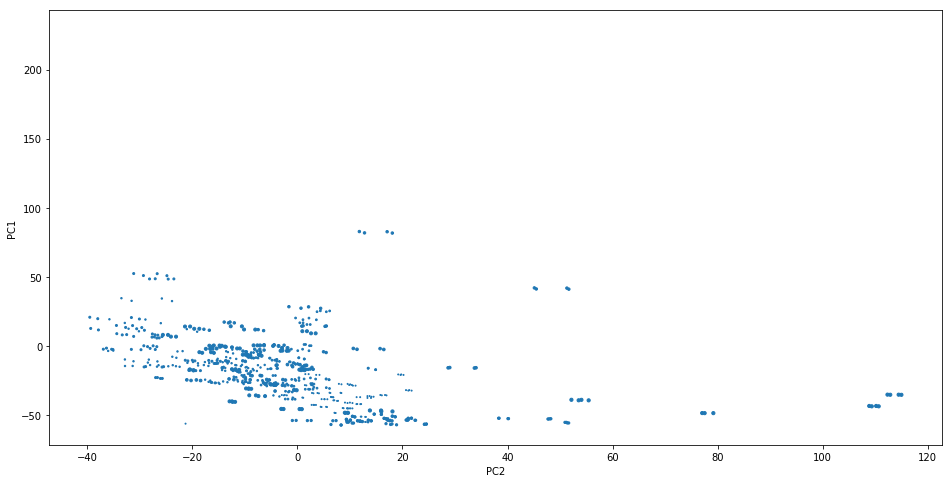

In [127]:
data_2d.plot(
    kind='scatter', 
    x='PC2', 
    y='PC1', 
    s=data_2d['pollution_mean_scaled']*10, 
    figsize=(16,8))


Sum instead of mean

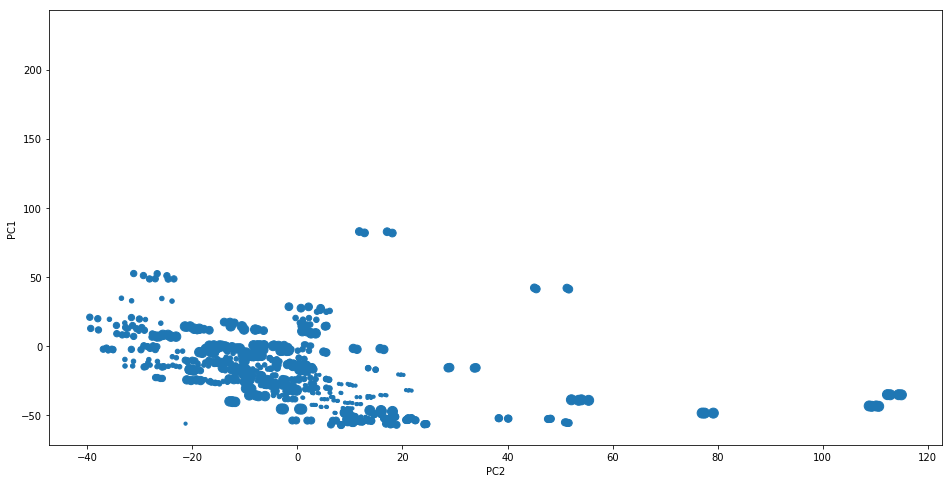

In [128]:
data_2d['pollution_sum'] = pd.Series(
    data.sum(axis=1), 
    index=data_2d.index)
pollution_sum_max = data_2d['pollution_sum'].max()
pollution_sum_min = data_2d['pollution_sum'].min()
pollution_sum_scaled =(data_2d.pollution_sum-pollution_sum_min) / pollution_sum_max
data_2d['pollution_sum_scaled'] = pd.Series(
        pollution_sum_scaled, 
        index=data_2d.index)
data_2d.plot(
    kind='scatter', 
    x='PC2', y='PC1', 
    s=data_2d['pollution_sum_scaled']*100, 
    figsize=(16,8))

From the plots we have done in Python, we can confirm that the most variation happens along the y axis, which we have assigned to PC1. We saw that the first PC already explains almost 73% of the variance, while the second one accounts for another 13% for a total of almost 86% between the two of them. At the very bottom of our charts we saw an important concentration of states, most of them are effected. While we ascend that axis, the number of countries is more sparse, and they belong to less effected regions of the world. When colouring/sizing points using two absolute magnitudes such as average and total number of cases, we can see that the directions also correspond to a variation in these magnitudes. Moreover, when using color/size to code the difference in the amount of pollution, the color gradient mostly changed along the direction of the second principal component, with more positive values (i.e. increase in pollution content) coloured in blue or with bigger size.

Citations:[1]Data Dimension. (n.d.). Retrieved December 04, 2017, from https://data-warehouses.net/glossary/datadimensions.html [2]Dianes, J. A. (n.d.). Data Science with Python & R: Dimensionality Reduction and Clustering. Retrieved December 04, 2017, from https://www.codementor.io/jadianes/data-science-python-pandas-r-dimensionality-reduction-du1081aka